In [339]:
import pandas as pd
import os
import matplotlib

data = pd.read_csv("original_life_expectancy_data.csv")

IMMUNIZATION_COLUMNS = ["Country", "Year", "Life expectancy ", "Diphtheria ", "Polio"]

In [340]:
idata = data[IMMUNIZATION_COLUMNS].copy()

In [341]:
idata.head()

,Country,Year,Life expectancy,Diphtheria,Polio
0,Afghanistan,2015,65.0,65.0,6.0
1,Afghanistan,2014,59.9,62.0,58.0
2,Afghanistan,2013,59.9,64.0,62.0
3,Afghanistan,2012,59.5,67.0,67.0
4,Afghanistan,2011,59.2,68.0,68.0


In [342]:
idata.columns

Index(['Country', 'Year', 'Life expectancy ', 'Diphtheria ', 'Polio'], dtype='object')

In [343]:
idata.columns = ['country', 'year', 'life_expectancy', 'diphtheria', 'polio']

In [344]:
idata.columns

Index(['country', 'year', 'life_expectancy', 'diphtheria', 'polio'], dtype='object')

In [345]:
measles = pd.read_csv("measles_immunization.csv")
measles = measles[['Country Name', '2015']].copy()
measles.columns = ['country', 'measles']
idata = idata.merge(measles, how="left", on="country")

In [346]:
idata['immunization_score'] = round((idata['diphtheria'] + idata['polio'] + idata['measles']) / 3, 2)
idata.head()

,country,year,life_expectancy,diphtheria,polio,measles,immunization_score
0,Afghanistan,2015,65.0,65.0,6.0,63.0,44.67
1,Afghanistan,2014,59.9,62.0,58.0,63.0,61.00
2,Afghanistan,2013,59.9,64.0,62.0,63.0,63.00
3,Afghanistan,2012,59.5,67.0,67.0,63.0,65.67
4,Afghanistan,2011,59.2,68.0,68.0,63.0,66.33


In [347]:
print(f"Number of countries: {len(idata['country'].unique())}")

Number of countries: 193


In [348]:
idata.drop(idata[idata['year'] != 2014].index, inplace=True)
idata.head()

,country,year,life_expectancy,diphtheria,polio,measles,immunization_score
1,Afghanistan,2014,59.9,62.0,58.0,63.0,61.00
17,Albania,2014,77.5,98.0,98.0,97.0,97.67
33,Algeria,2014,75.4,95.0,95.0,95.0,95.00
49,Angola,2014,51.7,64.0,68.0,51.0,61.00
65,Antigua and Barbuda,2014,76.2,99.0,96.0,91.0,95.33


In [349]:
# idata.drop(idata[idata['immunization_score'] < 80].index, inplace=True)

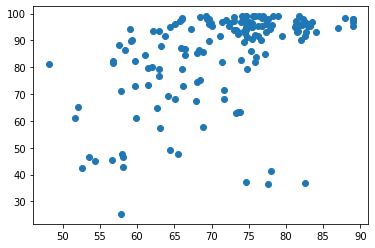

In [352]:
import matplotlib.pyplot as mpl

mpl.scatter(idata['life_expectancy'], idata['immunization_score'])

In [351]:
measles = pd.read_csv("measles_immunization.csv")